In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

Season = ["Winter", "Spring", "Summer", "Autumn"]

In [4]:
N_head = 5 # first 5 lines are head lines, not include data
N_column = 4 + 2

# Nx = 36
# Ny = 21
# Nz = 5
# N_parcel = 3780

Nx = 24
Ny = 21
Nz = 6+1
N_parcel = Nx*Ny*Nz

# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    

N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)


lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lon = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lev = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
Lon1 = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
Lat1 = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
Lev1 = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year)) 


Nz2 = 1
lifetime2   = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_N = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_S = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
Lon2 = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
Lat2 = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
Lev2 = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year)) 

if Nz!=(Nz1+Nz2): print("Error: Nz=Nz1+Nz2!!!")

(7, 21, 24, 10, 12, 10)


In [5]:
# for first 6 altitude injections

directory1 = '../Lifetime/'
filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)


for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            data_x = []
            data_y = []
            data_z = []
            for line1 in Lines1:
                a = line1.split(',')
                data.append(float(a[0])) # total lifetime
                data_N.append(float(a[1])) # total N lifetime
                data_S.append(float(a[2])) # total S lifetime
                data_x.append(float(a[3])) # lon
                data_y.append(float(a[4])) # lat
                data_z.append(float(a[5])) # p
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        lifetime1[iz,iy,ix,i_day,i_month,i_year]   = data[i]
                        lifetime1_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime1_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        Lon1[iz,iy,ix,i_day,i_month,i_year] = data_x[i]
                        Lat1[iz,iy,ix,i_day,i_month,i_year] = data_y[i]
                        Lev1[iz,iy,ix,i_day,i_month,i_year] = data_z[i]

                        i = i+1
                        

  0%|          | 0/12 [00:00<?, ?it/s]

../Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:01<00:00,  6.86it/s]


In [6]:
# for 21-km injection

directory2 = '../21km_post_process/Lifetime_21km/'
filename2 = "Lifetime_"+Years[0]+Months[0]+Days[0]+"_21km.txt"
print(directory2+filename2)


for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+"_21km.txt"
            File2 = open(directory2+filename2, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            data_x = []
            data_y = []
            data_z = []
            for line2 in Lines2:
                a = line2.split(',')
                data.append(float(a[0])) # total lifetime
                data_N.append(float(a[1])) # total N lifetime
                data_S.append(float(a[2])) # total S lifetime
                data_x.append(float(a[3])) # lon
                data_y.append(float(a[4])) # lat
                data_z.append(float(a[5])) # p
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz2):
                        lifetime2[iz,iy,ix,i_day,i_month,i_year]   = data[i]
                        lifetime2_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime2_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        Lon2[iz,iy,ix,i_day,i_month,i_year] = data_x[i]
                        Lat2[iz,iy,ix,i_day,i_month,i_year] = data_y[i]
                        Lev2[iz,iy,ix,i_day,i_month,i_year] = data_z[i]

                        i = i+1

 17%|█▋        | 2/12 [00:00<00:00, 19.51it/s]

../21km_post_process/Lifetime_21km/Lifetime_20000101_21km.txt


100%|██████████| 12/12 [00:00<00:00, 22.36it/s]


In [7]:
# Combine (1) 6 altitude injections and (2) 21-km injection

# Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
# Height   = [16,  18, 19, 20, 21, 22, 24] # km

lifetime[0:4,:,:,:,:,:]   = lifetime1[0:4,:,:,:,:,:]
lifetime_N[0:4,:,:,:,:,:] = lifetime1_N[0:4,:,:,:,:,:]
lifetime_S[0:4,:,:,:,:,:] = lifetime1_S[0:4,:,:,:,:,:]
Lon[0:4,:,:,:,:,:] = Lon1[0:4,:,:,:,:,:]
Lat[0:4,:,:,:,:,:] = Lat1[0:4,:,:,:,:,:]
Lev[0:4,:,:,:,:,:] = Lev1[0:4,:,:,:,:,:]

# 21-km
lifetime[4,:,:,:,:,:]   = lifetime2[0,:,:,:,:,:]
lifetime_N[4,:,:,:,:,:] = lifetime2_N[0,:,:,:,:,:]
lifetime_S[4,:,:,:,:,:] = lifetime2_S[0,:,:,:,:,:]
Lon[4,:,:,:,:,:] = Lon2[0,:,:,:,:,:]
Lat[4,:,:,:,:,:] = Lat2[0,:,:,:,:,:]
Lev[4,:,:,:,:,:] = Lev2[0,:,:,:,:,:]


lifetime[5:7,:,:,:,:,:]   = lifetime1[4:6,:,:,:,:,:]
lifetime_N[5:7,:,:,:,:,:] = lifetime1_N[4:6,:,:,:,:,:]
lifetime_S[5:7,:,:,:,:,:] = lifetime1_S[4:6,:,:,:,:,:]
Lon[5:7,:,:,:,:,:] = Lon1[4:6,:,:,:,:,:]
Lat[5:7,:,:,:,:,:] = Lat1[4:6,:,:,:,:,:]
Lev[5:7,:,:,:,:,:] = Lev1[4:6,:,:,:,:,:]

### Change the Lon and Lat order, and change the lifetime data order in corresponding to the Lon/Lat order

In [8]:
LON_1d = Lon[0,0,:,0,0,0]
LAT_1d = Lat[0,:,0,0,0,0]

In [9]:
# First for LON: change (0,360) to (-180,180)

#################
# correst method 1:
#################
# lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

lifetime_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


print("LON Before: ", LON_1d)

for i in range(len(LON_1d)):
    if LON_1d[i]>=180: LON_1d[i] = LON_1d[i]-360

# sort
idx = np.argsort(LON_1d)
# print(idx)

LON_1d = LON_1d[idx]

Lon_new = Lon[:,:,idx,:,:,:]
Lat_new = Lat
# lifetime_season_mean_new = lifetime_season_mean[:,:,idx,:]
# lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,idx,:]
# lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,idx,:]

lifetime_new = lifetime[:,:,idx,:,:,:]
lifetime_N_new = lifetime_N[:,:,idx,:,:,:]
lifetime_S_new = lifetime_S[:,:,idx,:,:,:]

print("LON After: ", LON_1d)

print("")
print(lifetime_new.shape)


#################
# wrong method 2:
#################

# lifetime_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
# lifetime_N_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
# lifetime_S_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
# 
# LON_1d = LON_1d - 180 ### shw ???
# 
# 
# Lon_new = Lon - 180
# Lat_new = Lat
# 
# lifetime_new = lifetime[:,:,:,:,:,:]
# lifetime_N_new = lifetime_N[:,:,:,:,:,:]
# lifetime_S_new = lifetime_S[:,:,:,:,:,:]

LON Before:  [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255. 270. 285. 300. 315. 330. 345.]
LON After:  [-180. -165. -150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.
    0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.]

(7, 21, 24, 10, 12, 10)


In [10]:
# Second for LAT: change (-20,20) to (20,-20)

Lon_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


print("LAT Before: ", LAT_1d)
LAT_1d = LAT_1d[::-1]
print("LAT After: ", LAT_1d)

Lon_new2 = Lon_new[:,::-1,:,:,:,:]
Lat_new2 = Lat_new[:,::-1,:,:,:,:]

lifetime_new2 = lifetime_new[:,::-1,:,:,:,:]
lifetime_N_new2 = lifetime_N_new[:,::-1,:,:,:,:]
lifetime_S_new2 = lifetime_S_new[:,::-1,:,:,:,:]

print("")
print(lifetime_new.shape)

LAT Before:  [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]
LAT After:  [ 30.  27.  24.  21.  18.  15.  12.   9.   6.   3.   0.  -3.  -6.  -9.
 -12. -15. -18. -21. -24. -27. -30.]

(7, 21, 24, 10, 12, 10)


## Seasonal mean

In [11]:


# lifetime(Nz, Ny, Nx, N_day, N_month, N_year)

lifetime_mon = np.mean(lifetime_new, axis=(3,5))
lifetime_N_mon = np.mean(lifetime_N_new, axis=(3,5))
lifetime_S_mon = np.mean(lifetime_S_new, axis=(3,5))


# lifetime_mon(Nz, Ny, Nx, N_month)
N_season = 4

lifetime_season = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season = np.zeros((Nz, Ny, Nx, N_season))


# for Winter
lifetime_season[:,:,:,0]   = np.mean(lifetime_mon[:,:,:,[0,1,11]], axis=3)
lifetime_N_season[:,:,:,0] = np.mean(lifetime_N_mon[:,:,:,[0,1,11]], axis=3)
lifetime_S_season[:,:,:,0] = np.mean(lifetime_S_mon[:,:,:,[0,1,11]], axis=3)
    
# for Spring, Summer and Autumn
for i in range(1,N_season):
    print(i,i*3-1,(i+1)*3-1)
    lifetime_season[:,:,:,i]   = np.mean(  lifetime_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    lifetime_N_season[:,:,:,i] = np.mean(lifetime_N_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    lifetime_S_season[:,:,:,i] = np.mean(lifetime_S_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    
lifetime_season.shape

1 2 5
2 5 8
3 8 11


(7, 21, 24, 4)

## Strategy_Uni

In [12]:
Inject_Percent_Uni = np.zeros((Nz, Ny, Nx, N_season))
Inject_Percent_Uni[:,:,:,:] = 1/(Nx*Ny)*100 # (unit: %)

D_lifetime_uniform = lifetime_N_season[:,:,:,:] - lifetime_S_season[:,:,:,:]

In [13]:
Nx*Ny

504

In [14]:
# Inject_Percent_Uni

## Strategy_LP

In [15]:
# LP solver

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

# (Nz, Ny, Nx, N_season)

Inject_Percent_LP = np.zeros((Nz, Ny, Nx, N_season))

Result_season  = lifetime_season[0,:,:,:]*0.0
Lifetime_LP    = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_N  = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_S  = lifetime_season[:,:,:,:]*0.0
D_lifetime_LP  = lifetime_season[:,:,:,:]*0.0

iz = 3

Diff_NS = 0.01

# for LP solve: max lifetime under the interhemispheric balance
for iz in range(Nz):
    print(iz)
    for iseason in range(N_season):
        Life   = lifetime_season[iz,:,:,iseason].flatten()
        Life_S = lifetime_N_season[iz,:,:,iseason].flatten()
        Life_N = lifetime_S_season[iz,:,:,iseason].flatten()

        if abs(sum(Life_S)+sum(Life_N)-sum(Life)) >0.01: print("ERROR!!!")
    
        N = len(Life)

        #
        c = -1*Life

        Xs_bounds = []
        A1 = []
        A3 = []
        A4 = []
        A  = []
        for i in range(N):
            Xs_bounds.append((0, N))
            A1.append(1)
            A3.append( Life_N[i] -Life_S[i] -Diff_NS*Life[i] )
            A4.append( -1*( Life_N[i] - Life_S[i] + Diff_NS*Life[i] ) )

        Aub = [A3,A4]
        Aeq = [A1]   

        b_ub = [0,0]
        b_eq = [N]

        from scipy.optimize import linprog
        res = linprog(c, A_eq=Aeq, b_eq=b_eq, A_ub=Aub, b_ub=b_ub, bounds=Xs_bounds)
    
        # post-process, calculate the injection percentage
        Result1d = np.round(res.x)
        Result2d = Result1d.reshape(Ny,Nx)
        Result2d = Result2d/np.sum(Result2d)*100
    
        Result_season[:,:,iseason] = Result2d
        
        
        #---------------------------------------------------------------------------------
        if iz==3:
            a = Result2d
            # Converts a flat index or array of flat indices into a tuple of coordinate arrays
            idx = np.unravel_index(np.argmax(a, axis=None), a.shape) 
            print(iz,idx[0], idx[1], LAT_1d[idx[0]], LON_1d[idx[1]], a[idx[0], idx[1]], iseason)
            
            # zero our the max, then repeat to select second max
            a[idx[0], idx[1]] = 0
            idx = np.unravel_index(np.argmax(a, axis=None), a.shape) 
            print(iz,idx[0], idx[1], LAT_1d[idx[0]], LON_1d[idx[1]], a[idx[0], idx[1]], iseason)
            
            print('...')
            
            
    
    Inject_Percent_LP[iz,:,:,:] = Result_season # (unit: %)
    
    Lifetime_LP[iz,:,:,:] = lifetime_season[iz,:,:,:]* (Result_season/100)

    Lifetime_LP_N[iz,:,:,:] = lifetime_N_season[iz,:,:,:]* (Result_season/100)
    Lifetime_LP_S[iz,:,:,:] = lifetime_S_season[iz,:,:,:]* (Result_season/100)
    D_lifetime_LP[iz,:,:,:] = Lifetime_LP_N[iz,:,:,:] - Lifetime_LP_S[iz,:,:,:]

print(lifetime_season[:,:,:,:].shape, Result_season.shape)


0
1
2
3
3 10 2 0.0 -150.0 79.56349206349206 0
3 11 3 -3.0 -135.0 20.436507936507937 0
...
3 11 2 -3.0 -150.0 60.317460317460316 1
3 10 2 0.0 -150.0 39.682539682539684 1
...
3 9 16 3.0 60.0 78.37301587301587 2
3 12 3 -6.0 -135.0 21.626984126984127 2
...
3 9 23 3.0 165.0 85.11904761904762 3
3 10 20 0.0 120.0 14.880952380952381 3
...
4
5
6
(7, 21, 24, 4) (21, 24, 4)


In [16]:
# LP solver

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

# (Nz, Ny, Nx, N_season)

Inject_Percent_LP = np.zeros((Nz, Ny, Nx, N_season))

Result_season  = lifetime_season[0,:,:,:]*0.0
Lifetime_LP    = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_N  = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_S  = lifetime_season[:,:,:,:]*0.0
D_lifetime_LP  = lifetime_season[:,:,:,:]*0.0

iz = 3

Diff_NS = 0.005

# for LP solve: max lifetime under the interhemispheric balance
for iz in range(Nz):
    print(iz)
    for iseason in range(N_season):
        Life   = lifetime_season[iz,:,:,iseason].flatten()
        Life_S = lifetime_N_season[iz,:,:,iseason].flatten()
        Life_N = lifetime_S_season[iz,:,:,iseason].flatten()

        if abs(sum(Life_S)+sum(Life_N)-sum(Life)) >0.01: print("ERROR!!!")
    
        N = len(Life)

        #
        c = -1*Life

        Xs_bounds = []
        A1 = []
        A3 = []
        A4 = []
        A  = []
        for i in range(N):
            Xs_bounds.append((0, N))
            A1.append(1)
            A3.append( Life_N[i] -Life_S[i] )
            A4.append( -1*(Life_N[i] -Life_S[i] +Diff_NS*Life[i]) )

        Aub = [A3,A4]
        Aeq = [A1]   

        b_ub = [0,0]
        b_eq = [N]

        from scipy.optimize import linprog
        res = linprog(c, A_eq=Aeq, b_eq=b_eq, A_ub=Aub, b_ub=b_ub, bounds=Xs_bounds)
    
        # post-process, calculate the injection percentage
        Result1d = np.round(res.x)
        Result2d = Result1d.reshape(Ny,Nx)
        Result2d = Result2d/np.sum(Result2d)*100
    
        Result_season[:,:,iseason] = Result2d
        
        
        #---------------------------------------------------------------------------------
        if iz==3:
            a = Result2d
            # Converts a flat index or array of flat indices into a tuple of coordinate arrays
            idx = np.unravel_index(np.argmax(a, axis=None), a.shape) 
            print(iz,idx[0], idx[1], LAT_1d[idx[0]], LON_1d[idx[1]], a[idx[0], idx[1]], iseason)
            
            # zero our the max, then repeat to select second max
            a[idx[0], idx[1]] = 0
            idx = np.unravel_index(np.argmax(a, axis=None), a.shape) 
            print(iz,idx[0], idx[1], LAT_1d[idx[0]], LON_1d[idx[1]], a[idx[0], idx[1]], iseason)
            
            print('...')
            
            
    
    Inject_Percent_LP[iz,:,:,:] = Result_season # (unit: %)
    
    Lifetime_LP[iz,:,:,:] = lifetime_season[iz,:,:,:]* (Result_season/100)

    Lifetime_LP_N[iz,:,:,:] = lifetime_N_season[iz,:,:,:]* (Result_season/100)
    Lifetime_LP_S[iz,:,:,:] = lifetime_S_season[iz,:,:,:]* (Result_season/100)
    D_lifetime_LP[iz,:,:,:] = Lifetime_LP_N[iz,:,:,:] - Lifetime_LP_S[iz,:,:,:]

print(lifetime_season[:,:,:,:].shape, Result_season.shape)


0
1
2
3
3 10 2 0.0 -150.0 77.18253968253968 0
3 11 3 -3.0 -135.0 22.817460317460316 0
...
3 11 2 -3.0 -150.0 63.888888888888886 1
3 10 2 0.0 -150.0 36.11111111111111 1
...
3 9 16 3.0 60.0 76.78571428571429 2
3 12 3 -6.0 -135.0 23.214285714285715 2
...
3 9 23 3.0 165.0 82.53968253968253 3
3 10 20 0.0 120.0 17.46031746031746 3
...
4
5
6
(7, 21, 24, 4) (21, 24, 4)


In [17]:
# iz=3 for 20 km

            # select injection lat with max lifetime----------------
    
            # winter (12,1,2):  
#                 lat=0,  lon=-150, percent=80%
#                 lat=-3, lon=-135, percent=20%
                    
    
            # Spring (3,4,5):   
#                  lat=-3, lon=-150, percent=60%
#                  lat=0,  lon=-150, percent=40%

            # Summer (6,7,8):   
#                     lat=3,  lon=60, percent=78%
#                     lat=-6, lon=-135, percent=22%

            # Autumn (9,10,11): 
#                     lat=3,  lon=165, percent=85%
#                     lat=0,  lon=120, percent=15%

In [18]:
# LON_1d = Lon[0,0,:,0,0,0]
# LAT_1d = Lat[0,:,0,0,0,0]

len(LON_1d), len(LAT_1d)

(24, 21)

## Stratege_Y

In [19]:
# get max lifetime by only selecting LAT (averaged over all LON)

Inject_Percent_Y = np.zeros((Nz, Ny, Nx, N_season))

lifetime_season_Xmean   = np.mean(lifetime_season, axis=2)
lifetime_N_season_Xmean = np.mean(lifetime_N_season, axis=2)
lifetime_S_season_Xmean = np.mean(lifetime_S_season, axis=2)
print(lifetime_season_Xmean.shape)

Inject_percent    = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat   = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat_N = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat_S = np.zeros((Nz, Ny, N_season))
D_lifetime_MaxLat = np.zeros((Nz, Ny, N_season))
print(Inject_percent.shape)

for iz in range(Nz):
    for i_season in range(N_season):
        a   = np.mean(lifetime_season[iz,:,:,i_season], axis=1)
        idx = np.unravel_index(np.argmax(a, axis=None), a.shape)
        if iz==3:
            print(iz,idx[0], LAT_1d[idx[0]],i_season)
        Inject_percent[iz,idx[0],i_season] = 100
        Inject_Percent_Y[iz,idx[0],:,i_season] = 1.0/Nx*100 # (unit:%)

    Lifetime_MaxLat[iz,:,:] = lifetime_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)

    Lifetime_MaxLat_N[iz,:,:] = lifetime_N_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)
    Lifetime_MaxLat_S[iz,:,:] = lifetime_S_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)
    D_lifetime_MaxLat[iz,:,:] = Lifetime_MaxLat_N[iz,:,:] - Lifetime_MaxLat_S[iz,:,:]

(7, 21, 4)
(7, 21, 4)
3 10 0.0 0
3 11 -3.0 1
3 9 3.0 2
3 9 3.0 3


In [20]:
# Inject_Percent_Y[1,:,:,0]

# winter (12,1,2): lat=0
# Spring (3,4,5): lat=-3
# Summer (6,7,8): lat=3
# Autumn (9,10,11): lat=3

In [21]:
len(LON_1d), len(LAT_1d)

(24, 21)

## Strategy_XY

In [22]:
# get the max lifetime by selecting both LON and LAT

Inject_Percent_XY = np.zeros((Nz, Ny, Nx, N_season))

Inject_percent = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max   = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max_N = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max_S = np.zeros((Nz, Ny, Nx, N_season))
D_lifetime_max = np.zeros((Nz, Ny, Nx, N_season))

print(Inject_percent.shape)

for iz in range(Nz):
    for i_season in range(N_season):
        a   = lifetime_season[iz,:,:,i_season]
        # Converts a flat index or array of flat indices into a tuple of coordinate arrays
        idx = np.unravel_index(np.argmax(a, axis=None), a.shape) 
        if iz==3:
            print(iz,idx[0], idx[1], LAT_1d[idx[0]], LON_1d[idx[1]], i_season)
        Inject_percent[iz,idx[0],idx[1],i_season] = 100
        Inject_Percent_XY[iz,idx[0],idx[1],i_season] = 100 # (unit:%)

    Lifetime_max[iz,:,:,:] = lifetime_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)

    Lifetime_max_N[iz,:,:,:] = lifetime_N_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    Lifetime_max_S[iz,:,:,:] = lifetime_S_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    D_lifetime_max[iz,:,:,:] = Lifetime_max_N[iz,:,:,:] - Lifetime_max_S[iz,:,:,:]
    

(7, 21, 24, 4)
3 10 2 0.0 -150.0 0
3 10 2 0.0 -150.0 1
3 9 16 3.0 60.0 2
3 9 23 3.0 165.0 3


In [23]:
            # select injection lat with max lifetime----------------
            # winter (12,1,2):  lat=0,  lon=-150
            # Spring (3,4,5):   lat=-3, lon=-150
            # Summer (6,7,8):   lat=3,  lon=60
            # Autumn (9,10,11): lat=3,  lon=165

## For GRL figure 4

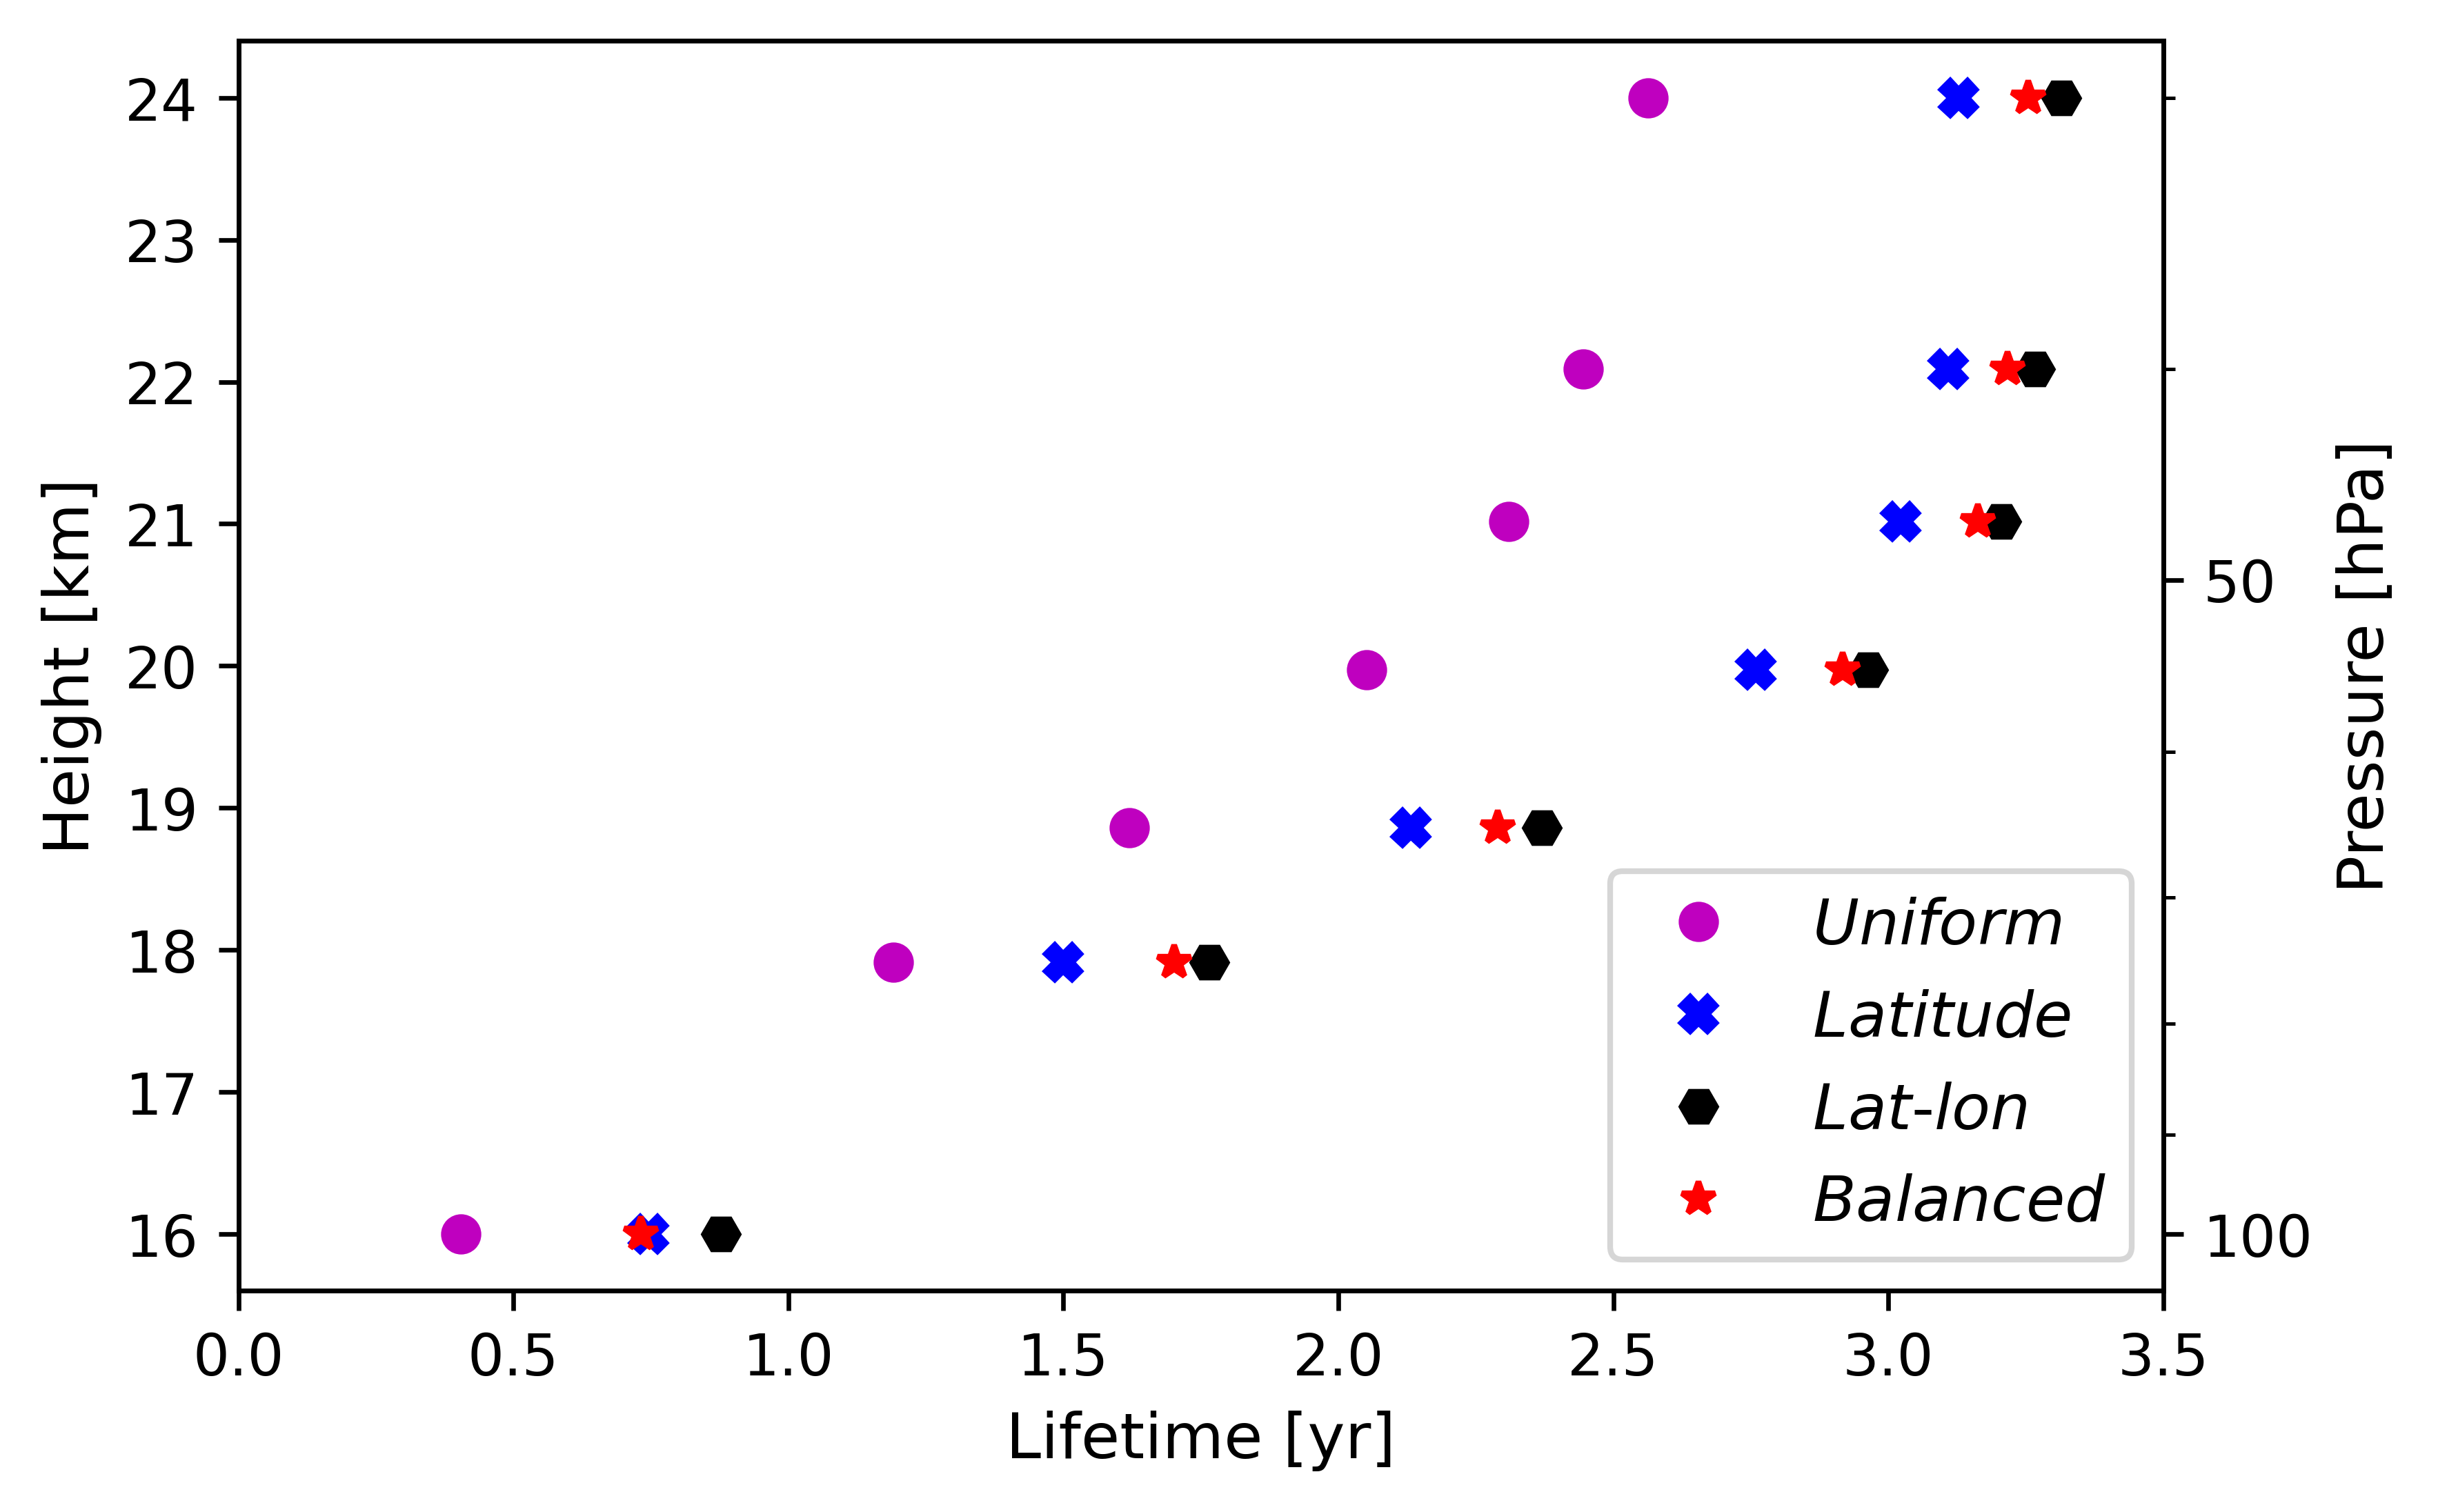

In [26]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import NullFormatter, FixedLocator

Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

Life_LP_season = np.sum(Lifetime_LP[:,:,:,:], axis=(1,2))/365.25
Life_MaxLat_season = np.sum(Lifetime_MaxLat[:,:,:], axis=(1))/365.25
Life_max_season = np.sum(Lifetime_max[:,:,:,:], axis=(1,2))/365.25
Life_uniform_season = np.mean(lifetime_season[:,:,:,:],axis=(1,2))/365.25

Life_LP_z  = np.mean(Life_LP_season[:,:],axis=1)
Life_MaxLat_z = np.mean(Life_MaxLat_season[:,:],axis=1)
Life_max_z = np.mean(Life_max_season[:,:],axis=1)
Life_uniform_z = np.mean(Life_uniform_season[:,:],axis=1)

### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=600)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(Life_uniform_z, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,3.5)

ax1.set_xlabel('Lifetime [yr]', fontsize=11)
ax1.set_ylabel('Height [km]', fontsize=11)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z, Pressure, 'bX', label='$Latitude$')
ax2.plot(Life_max_z, Pressure, 'kH', label='$Lat$-$lon$')
ax2.plot(Life_LP_z, Pressure, 'r*', label='$Balanced$')

# Lifet_MidLat = [0.5906438174428135, 0.7879687935711208, 0.9266164727355692]
# Pressure_MidLat = [100,100,100]
# ax2.plot(Lifet_MidLat[0], Pressure_MidLat[0], 'mo', alpha=0.2, label='$Uniform$ Mid-lat')
# ax2.plot(Lifet_MidLat[1], Pressure_MidLat[1], 'bX', alpha=0.2, label='$Latitude$ Mid-lat')
# ax2.plot(Lifet_MidLat[2], Pressure_MidLat[2], 'kH', alpha=0.2, label='$Lat$-$lon$ Mid-Lat')


ax2.set_ylabel('Pressure [hPa]', fontsize=11)
ax2.set_yticks([50, 100])
ax2.set_yscale('log')

ax2.yaxis.set_major_locator(FixedLocator([ 50, 100]))

ax2.yaxis.set_major_formatter(ScalarFormatter())
# ax2.yaxis.set_minor_formatter(ScalarFormatter())

# ax2.yaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_minor_formatter(NullFormatter())

ax2.invert_yaxis()
ax2.legend(loc="lower right", fontsize=11);

plt.savefig('Figure_4.jpg')

In [25]:
Life_uniform_z

array([0.404788  , 1.19138645, 1.62031249, 2.05162729, 2.30954152,
       2.44493802, 2.56364907])

In [26]:
Height_mid = []
Pressure_mid = []
Lifetime_uni_slope = []
Lifetime_MaxLat_slope = []
Lifetime_max_slope = []
Lifetime_LP_slope = []

for iz in range(Nz-1):
    Height_mid.append( (Height[iz]+Height[iz+1])/2 )
    Pressure_mid.append( (Pressure[iz]+Pressure[iz+1])/2 )
    
    Lifetime_uni_slope.append( (Life_uniform_z[iz+1]-Life_uniform_z[iz]) / (Height[iz+1]-Height[iz]) )
    Lifetime_MaxLat_slope.append( (Life_MaxLat_z[iz+1]-Life_MaxLat_z[iz]) / (Height[iz+1]-Height[iz]) )
    Lifetime_max_slope.append( (Life_max_z[iz+1]-Life_max_z[iz]) / (Height[iz+1]-Height[iz]) )
    Lifetime_LP_slope.append( (Life_LP_z[iz+1]-Life_LP_z[iz]) / (Height[iz+1]-Height[iz]) )

    
Height_mid = np.array(Height_mid)
Pressure_mid = np.array(Pressure_mid)
Lifetime_uni_slope = np.array(Lifetime_uni_slope)
Lifetime_MaxLat_slope = np.array(Lifetime_MaxLat_slope)
Lifetime_max_slope = np.array(Lifetime_max_slope)
Lifetime_LP_slope = np.array(Lifetime_LP_slope)   
    
    
Height_mid

array([16.96 , 18.395, 19.435, 20.525, 21.575, 23.05 ])

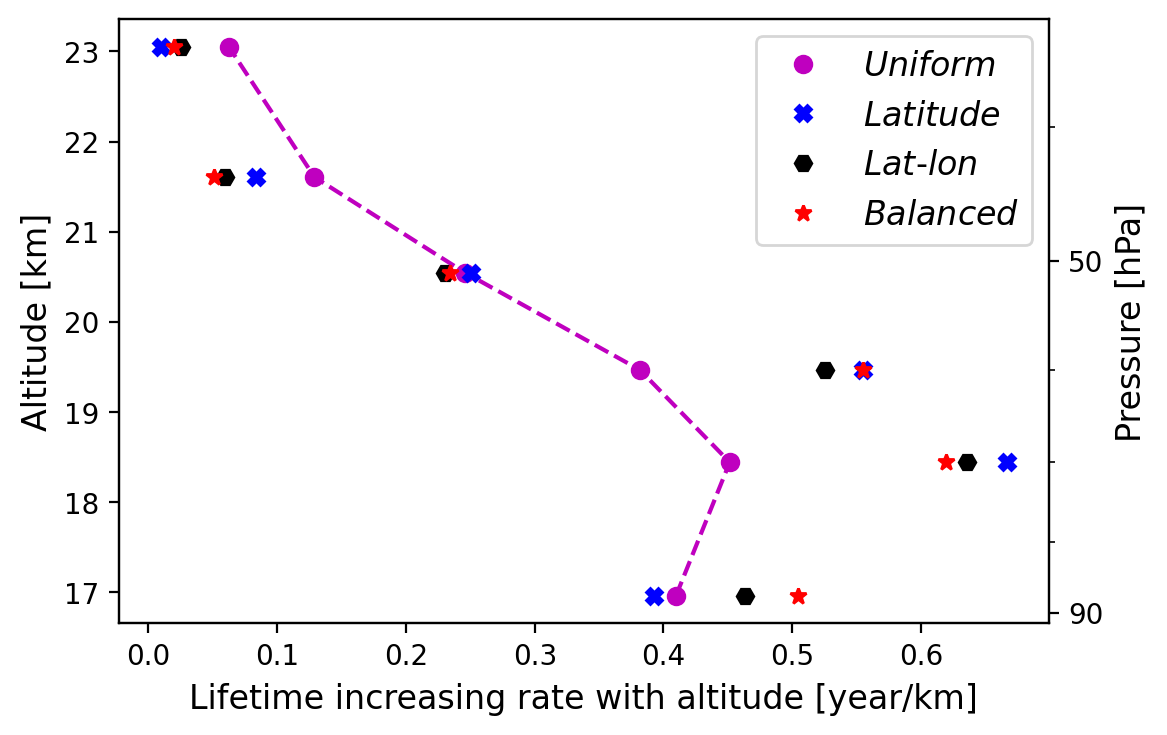

In [27]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=200)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(Lifetime_uni_slope, Height_mid, 'wo', label='Strategy_Uni')

# ax1.set_xlim(0,3.5)
# ax1.set_ylim(15.5,24.5)

ax1.set_xlabel('Lifetime increasing rate with altitude [year/km]', fontsize=12)
ax1.set_ylabel('Altitude [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Lifetime_uni_slope, Pressure_mid, 'mo', label='$Uniform$')
ax2.plot(Lifetime_uni_slope, Pressure_mid, 'm--')

ax2.plot(Lifetime_MaxLat_slope, Pressure_mid, 'bX', label='$Latitude$')
ax2.plot(Lifetime_max_slope, Pressure_mid, 'kH', label='$Lat$-$lon$')
ax2.plot(Lifetime_LP_slope, Pressure_mid, 'r*', label='$Balanced$')

# Lifet_MidLat = [0.5906438174428135, 0.7879687935711208, 0.9266164727355692]
# Pressure_MidLat = [100,100,100]
# ax2.plot(Lifet_MidLat[0], Pressure_MidLat[0], 'mo', alpha=0.2, label='$Uniform$ Mid-lat')
# ax2.plot(Lifet_MidLat[1], Pressure_MidLat[1], 'bX', alpha=0.2, label='$Latitude$ Mid-lat')
# ax2.plot(Lifet_MidLat[2], Pressure_MidLat[2], 'kH', alpha=0.2, label='$Lat$-$lon$ Mid-Lat')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yticks([50, 90])
ax2.set_yscale('log')
ax2.invert_yaxis()

ax2.yaxis.set_major_locator(FixedLocator([ 50, 90]))

ax2.yaxis.set_major_formatter(ScalarFormatter())
# ax2.yaxis.set_minor_formatter(ScalarFormatter())

# ax2.yaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_minor_formatter(NullFormatter())

ax2.legend(loc="upper right", fontsize=12);


In [28]:
len(Lifetime_uni_slope)

6

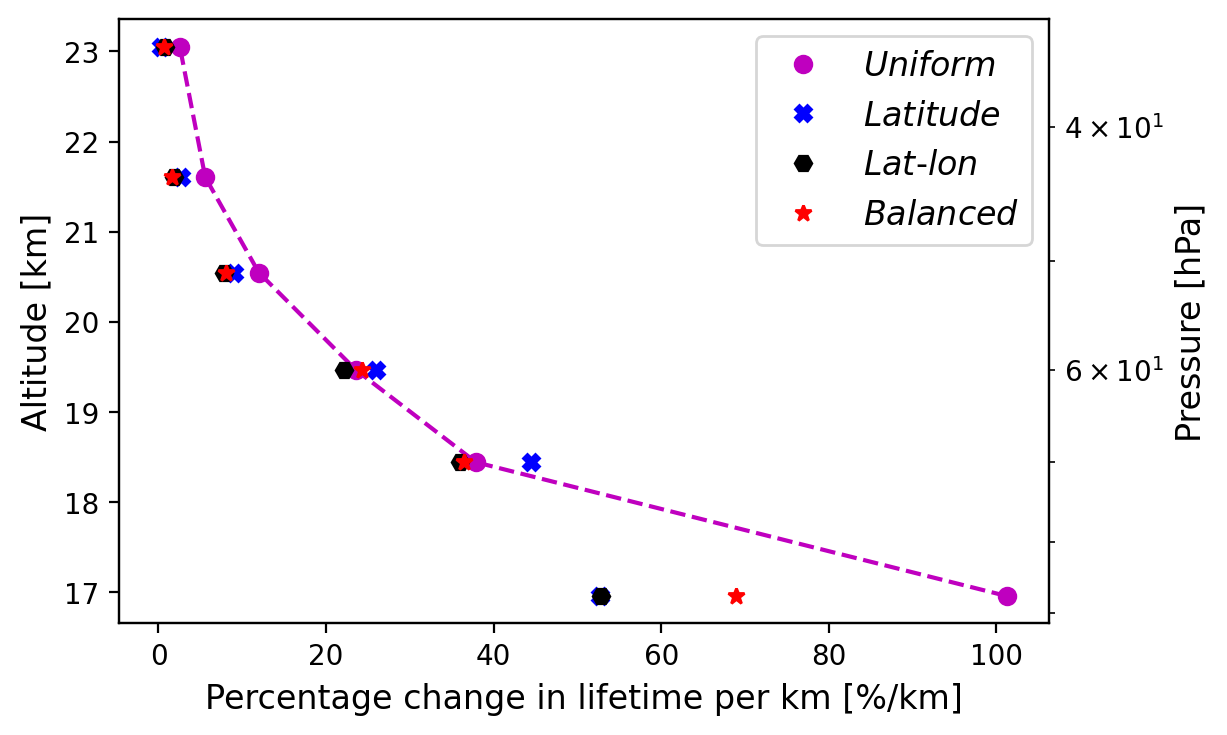

In [29]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=200)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(100*Lifetime_uni_slope/Life_uniform_z[0:6], Height_mid, 'wo', label='Strategy_Uni')

# ax1.set_xlim(0,3.5)
# ax1.set_ylim(15.5,24.5)

ax1.set_xlabel('Percentage change in lifetime per km [%/km]', fontsize=12)
ax1.set_ylabel('Altitude [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(100*Lifetime_uni_slope/Life_uniform_z[0:6], Pressure_mid, 'mo', label='$Uniform$')
ax2.plot(100*Lifetime_uni_slope/Life_uniform_z[0:6], Pressure_mid, 'm--')

ax2.plot(100*Lifetime_MaxLat_slope/Life_MaxLat_z[0:6], Pressure_mid, 'bX', label='$Latitude$')
ax2.plot(100*Lifetime_max_slope/Life_max_z[0:6], Pressure_mid, 'kH', label='$Lat$-$lon$')
ax2.plot(100*Lifetime_LP_slope/Life_LP_z[0:6], Pressure_mid, 'r*', label='$Balanced$')

# Lifet_MidLat = [0.5906438174428135, 0.7879687935711208, 0.9266164727355692]
# Pressure_MidLat = [100,100,100]
# ax2.plot(Lifet_MidLat[0], Pressure_MidLat[0], 'mo', alpha=0.2, label='$Uniform$ Mid-lat')
# ax2.plot(Lifet_MidLat[1], Pressure_MidLat[1], 'bX', alpha=0.2, label='$Latitude$ Mid-lat')
# ax2.plot(Lifet_MidLat[2], Pressure_MidLat[2], 'kH', alpha=0.2, label='$Lat$-$lon$ Mid-Lat')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper right", fontsize=12);

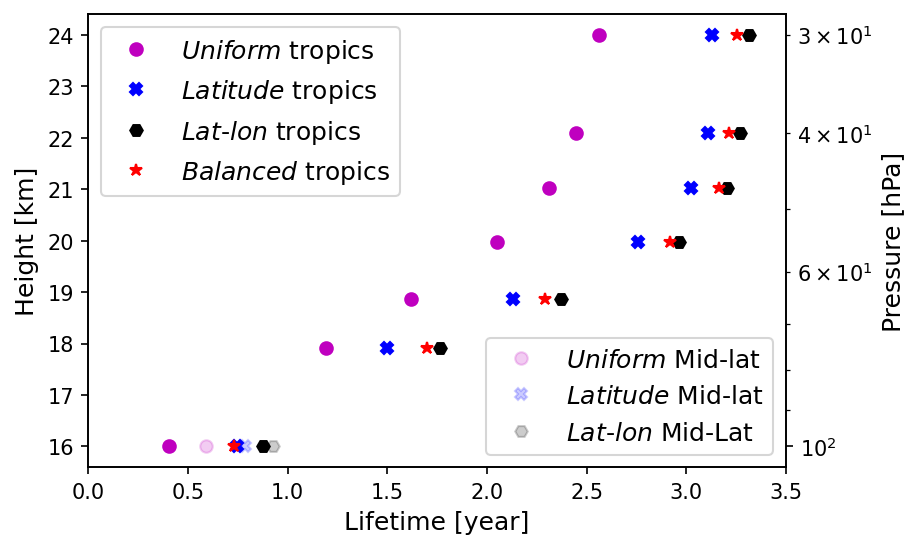

In [30]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

Life_LP_season = np.sum(Lifetime_LP[:,:,:,:], axis=(1,2))/365.25
Life_MaxLat_season = np.sum(Lifetime_MaxLat[:,:,:], axis=(1))/365.25
Life_max_season = np.sum(Lifetime_max[:,:,:,:], axis=(1,2))/365.25
Life_uniform_season = np.mean(lifetime_season[:,:,:,:],axis=(1,2))/365.25

Life_LP_z  = np.mean(Life_LP_season[:,:],axis=1)
Life_MaxLat_z = np.mean(Life_MaxLat_season[:,:],axis=1)
Life_max_z = np.mean(Life_max_season[:,:],axis=1)
Life_uniform_z = np.mean(Life_uniform_season[:,:],axis=1)

### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(Life_uniform_z, Height, 'wo')

Lifet_MidLat = [0.5906438174428135, 0.7879687935711208, 0.9266164727355692]
Pressure_MidLat = [100,100,100]
ax1.plot(Lifet_MidLat[0], Height[0], 'mo', alpha=0.2, label='$Uniform$ Mid-lat')
ax1.plot(Lifet_MidLat[1], Height[0], 'bX', alpha=0.2, label='$Latitude$ Mid-lat')
ax1.plot(Lifet_MidLat[2], Height[0], 'kH', alpha=0.2, label='$Lat$-$lon$ Mid-Lat')

ax1.set_xlim(0,3.5)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
ax1.legend(loc='lower right', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z, Pressure, 'mo', label='$Uniform$ tropics')
ax2.plot(Life_MaxLat_z, Pressure, 'bX', label='$Latitude$ tropics')
ax2.plot(Life_max_z, Pressure, 'kH', label='$Lat$-$lon$ tropics')
ax2.plot(Life_LP_z, Pressure, 'r*', label='$Balanced$ tropics')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);

###
# ax3 = ax1.twinx()
# ax3.plot(Life_LP_z, Pressure, 'b*', label='LP solver lifetime')

# ax3.set_ylabel('Pressure [hPa]', fontsize=12)
# ax3.set_yscale('log')
# ax3.invert_yaxis()
# ax3.legend(loc="upper left", fontsize=12);


# plt.title('Lifetime at different height (seasonal data)', fontsize=14);

In [31]:
print( Lifet_MidLat[0]-Life_uniform_z[0], (Lifet_MidLat[0]-Life_uniform_z[0])/Life_uniform_z[0] )

0.1858558152771589 0.45914358697098845


In [32]:
print( Lifet_MidLat[1]-Life_MaxLat_z[0], (Lifet_MidLat[1]-Life_MaxLat_z[0])/Life_MaxLat_z[0] )

0.04267247826197185 0.05725572149685364


In [33]:
Life_uniform_z

array([0.404788  , 1.19138645, 1.62031249, 2.05162729, 2.30954152,
       2.44493802, 2.56364907])

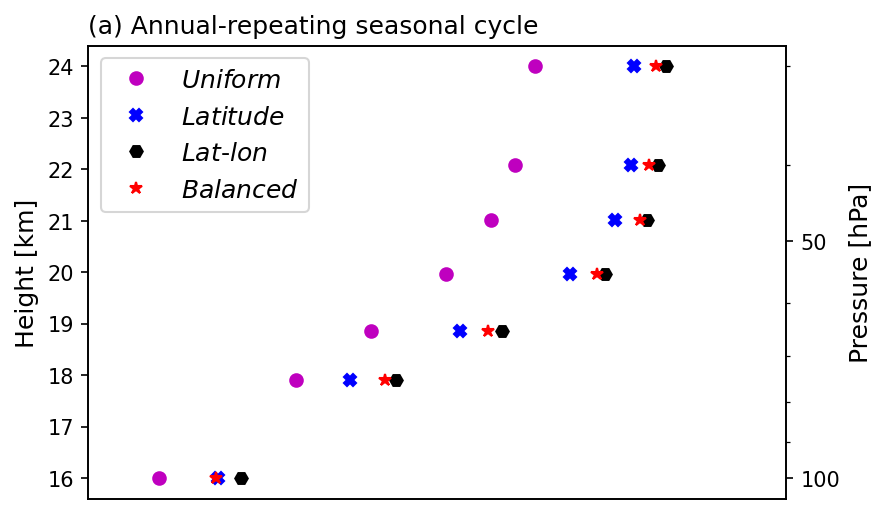

In [34]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(Life_uniform_z, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,4.0)

# ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);
ax1.axes.xaxis.set_visible(False)
ax1.set_title("(a) Annual-repeating seasonal cycle", fontsize=12, loc='left')

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z, Pressure, 'bX', label='$Latitude$')
ax2.plot(Life_max_z, Pressure, 'kH', label='$Lat$-$lon$')
ax2.plot(Life_LP_z, Pressure, 'r*', label='$Balanced$')


# ax2.set_ylabel('Pressure [hPa]', fontsize=12)
# ax2.set_yscale('log')
# ax2.invert_yaxis()
# ax2.legend(loc="upper left", fontsize=12);

ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yticks([50, 100])
ax2.set_yscale('log')
ax2.invert_yaxis()

ax2.yaxis.set_major_locator(FixedLocator([ 50, 100]))

ax2.yaxis.set_major_formatter(ScalarFormatter())
# ax2.yaxis.set_minor_formatter(ScalarFormatter())

# ax2.yaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_minor_formatter(NullFormatter())

ax2.legend(loc="upper left", fontsize=12);

In [35]:
np.max(Life_max_z), Life_uniform_z

(3.315012548482774,
 array([0.404788  , 1.19138645, 1.62031249, 2.05162729, 2.30954152,
        2.44493802, 2.56364907]))

In [36]:
test1 = Life_max_z
test2 = [1.21956537, 2.31805841, 2.94766598, 3.52817933, 3.7829238 , 3.80390828, 3.83550878]

(test2-test1)/test1*100

array([39.09509665, 31.26221709, 24.3851083 , 19.06162808, 18.02837295,
       16.41503091, 15.70118435])

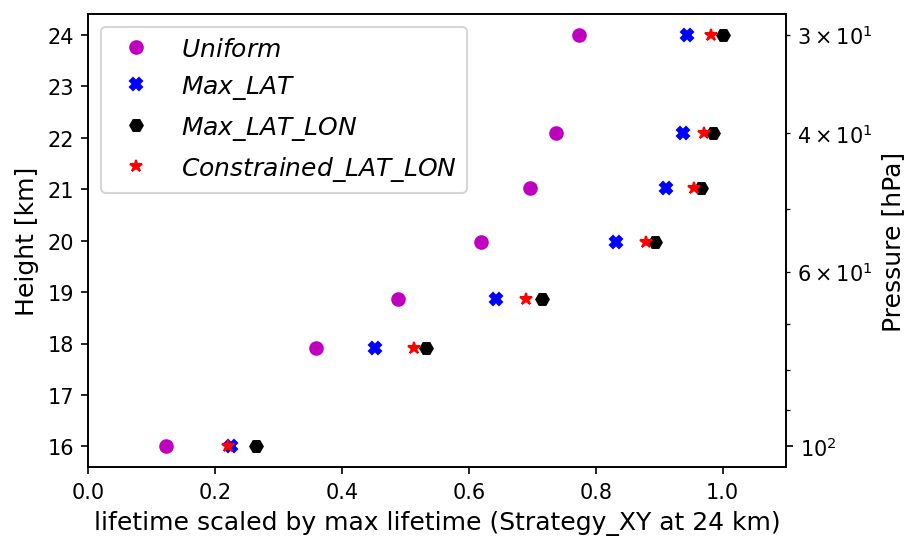

In [37]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

Maximum = np.max(Life_max_z)

###
ax1.plot(Life_uniform_z/Maximum, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,1.1)

ax1.set_xlabel('lifetime scaled by max lifetime (Strategy_XY at 24 km)', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z/Maximum, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z/Maximum, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(Life_max_z/Maximum, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(Life_LP_z/Maximum, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);

In [38]:

Life_max_AllMean = np.mean(Life_max_z)
Life_LP_AllMean = np.mean(Life_LP_z)
Life_MaxLat_AllMean = np.mean(Life_MaxLat_z)
Life_uniform_AllMean = np.mean(Life_uniform_z)

Life_max_AllMean, Life_LP_AllMean, Life_MaxLat_AllMean, Life_uniform_AllMean

(2.537646100192301, 2.46779513832303, 2.3422287544951814, 1.798034693153252)

In [39]:
D_lifetime_LP.shape, D_lifetime_max.shape, D_lifetime_MaxLat.shape, D_lifetime_uniform.shape

((7, 21, 24, 4), (7, 21, 24, 4), (7, 21, 4), (7, 21, 24, 4))

In [40]:
# use np.sum if a injection percent is applied to the variable before

D_lifetime_LP_XYmean      = np.sum(D_lifetime_LP, axis=(1,2))
D_lifetime_MaxLat_XYmean  = np.sum(D_lifetime_MaxLat, axis=(1))
D_lifetime_max_XYmean     = np.sum(D_lifetime_max, axis=(1,2))
D_lifetime_uniform_XYmean = np.mean(D_lifetime_uniform, axis=(1,2))

D_lifetime_LP_XYmean.shape, D_lifetime_max_XYmean.shape, D_lifetime_MaxLat_XYmean.shape, D_lifetime_uniform_XYmean.shape

((7, 4), (7, 4), (7, 4), (7, 4))

In [41]:
print(np.mean(abs(D_lifetime_LP_XYmean), axis=1))
print(np.mean(abs(D_lifetime_max_XYmean), axis=1))
print(np.mean(abs(D_lifetime_MaxLat_XYmean), axis=1))
print(np.mean(abs(D_lifetime_uniform_XYmean), axis=1))

[0.80327381 1.40991402 1.06069279 0.22493717 1.62707672 1.59103671
 0.92849702]
[227.0025     154.19916667 192.7925     126.46166667 247.13
 253.32083333 240.52833333]
[203.46364583 198.34017361 187.74        61.8971875  203.48875
 208.97743056 243.08555556]
[23.92588459 36.4073297  34.4313955  21.42538029 14.40904927 18.74934689
 34.5899537 ]


In [42]:
print(np.mean(abs(D_lifetime_LP_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_max_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_MaxLat_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_uniform_XYmean), axis=(0,1))/365.25)

0.0029902916752677583
0.5637762784785372
0.5111930157643712
0.07194224697255895


## piecewise regression

https://datascience.stackexchange.com/questions/8457/python-library-for-segmented-regression-a-k-a-piecewise-regression

Muggeo, V. M. (2003). Estimating regression models with unknown breakpoints. Statistics in medicine, 22(19), 3055-3071.

In [43]:
import numpy as np
from numpy.linalg import lstsq

ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

def SegmentedLinearReg( X, Y, breakpoints ):
#     nIterationMax = 10
    nIterationMax = 100 ### shw


    breakpoints = np.sort( np.array(breakpoints) )

#     dt = np.min( np.diff(X) )
    dt = np.min( np.diff(X)/10 ) ### shw
    
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  lstsq(A.transpose(), Y, rcond=None)[0] 

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck
        print(newBreakpoints)

        # Stop condition
#         if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5: ### shw
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/100: ### shw
            break

        breakpoints = newBreakpoints
    else:
        print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) )
    ones =  np.ones_like(Xsolution) 
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis=0 )

    return Xsolution, Ysolution

[1.8607353]
[2.10534246]
[2.27692837]
[2.27692837]
slope [yr/km]: 0.41 and 0.09
[2.90404704]
[3.00790929]
[3.00790929]
slope [yr/km]: 0.51 and 0.04
[2.75661434]
[3.022422]
[3.18974224]
[3.18974224]
slope [yr/km]: 0.53 and 0.04
[2.60167322]
[2.96969666]
[3.1505176]
[3.1505176]
slope [yr/km]: 0.55 and 0.03


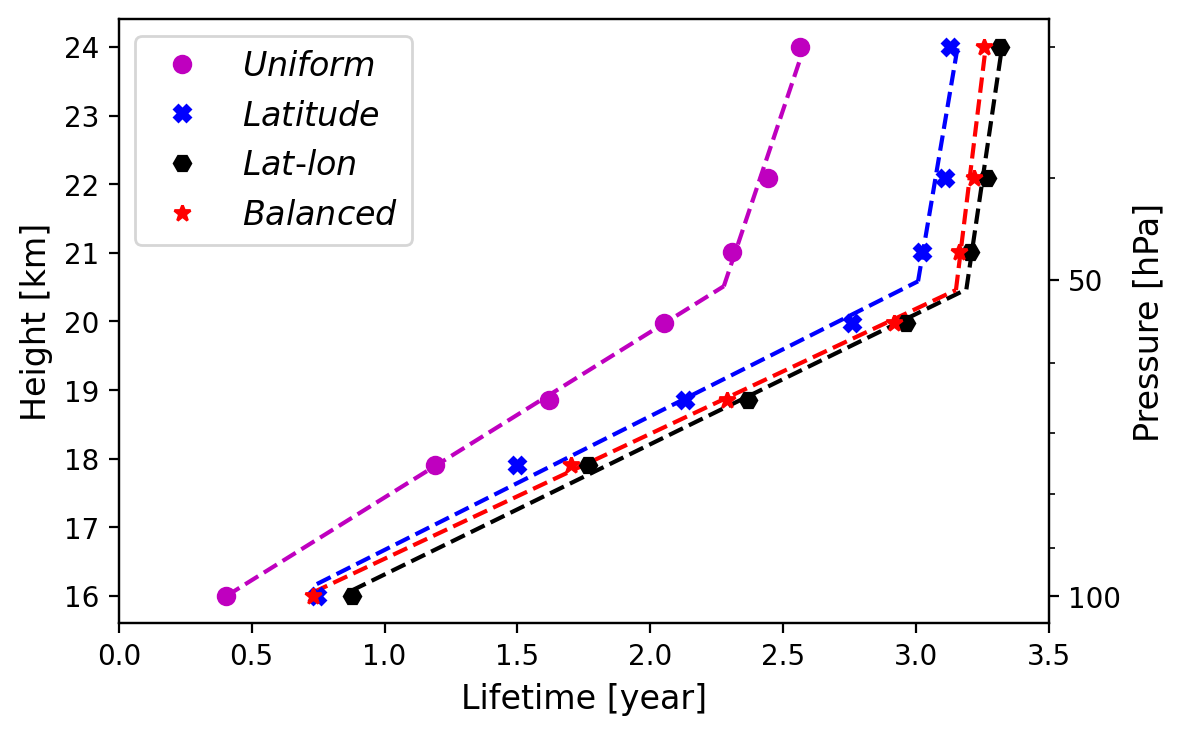

In [44]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=200)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(Life_uniform_z, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,3.5)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z, Pressure, 'bX', label='$Latitude$')
ax2.plot(Life_max_z, Pressure, 'kH', label='$Lat$-$lon$')
ax2.plot(Life_LP_z, Pressure, 'r*', label='$Balanced$')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yticks([50, 100])
ax2.set_yscale('log')
ax2.invert_yaxis()

ax2.yaxis.set_major_locator(FixedLocator([ 50, 100]))

ax2.yaxis.set_major_formatter(ScalarFormatter())
# ax2.yaxis.set_minor_formatter(ScalarFormatter())

# ax2.yaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_minor_formatter(NullFormatter())

ax2.legend(loc="upper left", fontsize=12);



# for piecewise regression

X1 = Life_uniform_z
X2 = Life_MaxLat_z
X3 = Life_max_z
X4 = Life_LP_z
Y = Height

N_init = 1
initialBreakpoints1 = [X1[N_init]]
# ax1.plot( *SegmentedLinearReg( X1, Y, initialBreakpoints1 ), 'm--', label=f'{initialBreakpoints1}');
Xsolution, Ysolution = SegmentedLinearReg( X1, Y, initialBreakpoints1 )
Y_end = Y[-1]
k = (Xsolution[-1]-Xsolution[-2]) / (Ysolution[-1]-Ysolution[-2])
X_end = Xsolution[-1] + k*(Y_end - Ysolution[-1])
ax1.plot(Xsolution[0:2], Ysolution[0:2],'m--')
ax1.plot([Xsolution[-2],X_end], [Ysolution[-2],Y_end],'m--')

k0 = (Xsolution[0]-Xsolution[1]) / (Ysolution[0]-Ysolution[1])
print(f"slope [yr/km]: {k0:.2f} and {k:.2f}")

initialBreakpoints2 = [X2[N_init]]
# ax1.plot( *SegmentedLinearReg( X2, Y, initialBreakpoints2 ), 'b--', label=f'{initialBreakpoints2}');
Xsolution, Ysolution = SegmentedLinearReg( X2, Y, initialBreakpoints2 )
Y_end = Y[-1]
k = (Xsolution[-1]-Xsolution[-2]) / (Ysolution[-1]-Ysolution[-2])
X_end = Xsolution[-1] + k*(Y_end - Ysolution[-1])
ax1.plot(Xsolution[0:2], Ysolution[0:2],'b--')
ax1.plot([Xsolution[-2],X_end], [Ysolution[-2],Y_end],'b--')

k0 = (Xsolution[0]-Xsolution[1]) / (Ysolution[0]-Ysolution[1])
print(f"slope [yr/km]: {k0:.2f} and {k:.2f}")

initialBreakpoints3 = [X3[N_init]]
# ax1.plot( *SegmentedLinearReg( X3, Y, initialBreakpoints3 ), 'k--', label=f'{initialBreakpoints3}');
Xsolution, Ysolution = SegmentedLinearReg( X3, Y, initialBreakpoints3 )
Y_end = Y[-1]
k = (Xsolution[-1]-Xsolution[-2]) / (Ysolution[-1]-Ysolution[-2])
X_end = Xsolution[-1] + k*(Y_end - Ysolution[-1])
ax1.plot(Xsolution[0:2], Ysolution[0:2],'k--')
ax1.plot([Xsolution[-2],X_end], [Ysolution[-2],Y_end],'k--')

k0 = (Xsolution[0]-Xsolution[1]) / (Ysolution[0]-Ysolution[1])
print(f"slope [yr/km]: {k0:.2f} and {k:.2f}")

initialBreakpoints4 = [X4[N_init]]
# ax1.plot( *SegmentedLinearReg( X4, Y, initialBreakpoints4 ), 'r--', label=f'{initialBreakpoints4}');
Xsolution, Ysolution = SegmentedLinearReg( X4, Y, initialBreakpoints4 )
Y_end = Y[-1]
k = (Xsolution[-1]-Xsolution[-2]) / (Ysolution[-1]-Ysolution[-2])
X_end = Xsolution[-1] + k*(Y_end - Ysolution[-1])
ax1.plot(Xsolution[0:2], Ysolution[0:2],'r--')
ax1.plot([Xsolution[-2],X_end], [Ysolution[-2],Y_end],'r--')

k0 = (Xsolution[0]-Xsolution[1]) / (Ysolution[0]-Ysolution[1])
print(f"slope [yr/km]: {k0:.2f} and {k:.2f}")

# plt.xlabel('X'); plt.ylabel('Y');
# plt.legend()

In [45]:
import matplotlib.pyplot as plt
# Life_uniform_z/Maximum, Height

# X1 = Life_uniform_z
# X2 = Life_MaxLat_z
# X3 = Life_max_z
# X4 = Life_LP_z
# Y = Pressure

# ax2.plot(Life_uniform_z/Maximum, Pressure, 'mo', label='$Uniform$')
# ax2.plot(Life_MaxLat_z/Maximum, Pressure, 'bX', label='$Max$_$LAT$')
# ax2.plot(Life_max_z/Maximum, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
# ax2.plot(Life_LP_z/Maximum, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')
# plt.plot( X1, Y, 'ok' );
# print(Life_uniform_z, Pressure)

# initialBreakpoints = [X1[1]]
# plt.plot( *SegmentedLinearReg( X1, Y, initialBreakpoints ), 'r-', label=f'{initialBreakpoints}');
# plt.xlabel('X'); plt.ylabel('Y');
# plt.legend()

# initialBreakpoints = [Life_uniform_z[2]]
# plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), 'k--', label=f'{initialBreakpoints}');
# plt.xlabel('X'); plt.ylabel('Y');
# plt.legend()

# initialBreakpoints = [Life_uniform_z[3]]
# plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), 'b-.', label=f'{initialBreakpoints}');
# plt.xlabel('X'); plt.ylabel('Y');
# plt.legend()

# initialBreakpoints = [Life_uniform_z[4]]
# plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), '-r', label=f'{initialBreakpoints}');
# plt.xlabel('X'); plt.ylabel('Y');
# plt.legend()

## Supporting Information

### check Lon, Lat are correct !!!

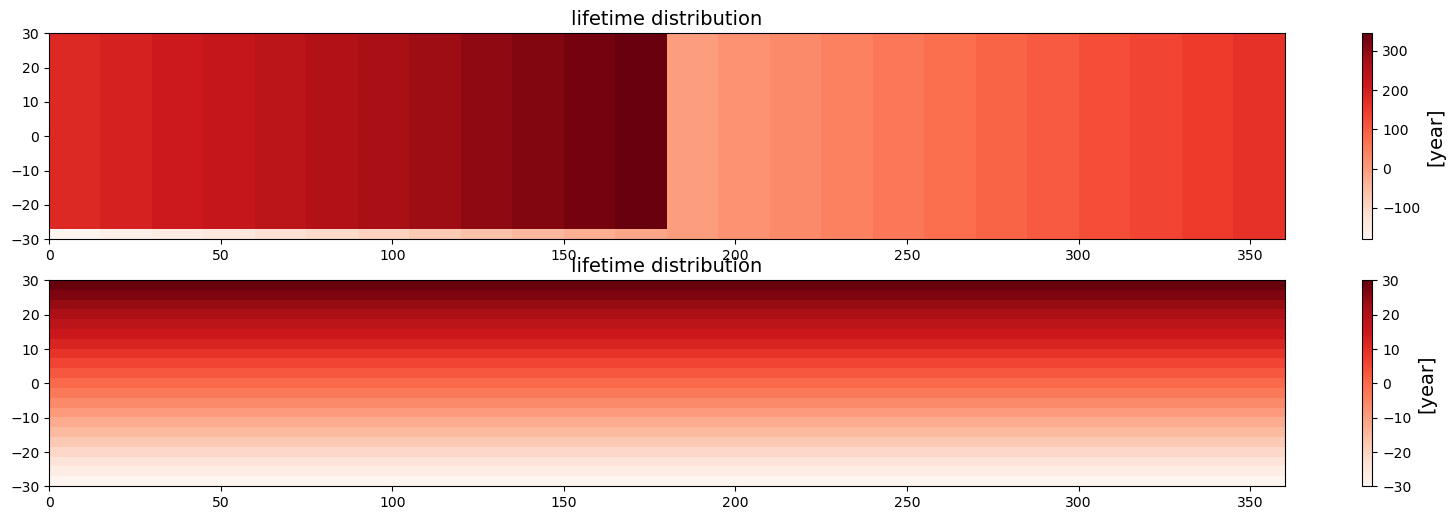

In [46]:

fig = plt.figure(figsize=(20,6), dpi=100)
extent = [0 , 360 , -30 , 30]

# Lon[iz,iy,ix,i_day,i_month,i_year]
# lifetime
ax0 = plt.subplot(2, 1, 1)

ax0_pixel = plt.imshow(Lon_new2[0,:,:,0,0,0],\
           extent = extent, cmap='Reds', interpolation='nearest')

cb0 = plt.colorbar(ax0_pixel, ax=ax0)
cb0.set_label('[year]', fontsize=14);

ax0.set_title(f"lifetime distribution", fontsize=14);
# ax0.set_title(f"Month: {i_mon+1}", fontsize=14, loc="left");


###
ax1 = plt.subplot(2, 1, 2)

ax1_pixel = plt.imshow(Lat_new2[0,:,:,0,0,0],\
           extent = extent, cmap='Reds', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[year]', fontsize=14);

ax1.set_title(f"lifetime distribution", fontsize=14);
# ax1.set_title(f"Month: {i_mon+1}", fontsize=14, loc="left");

In [47]:
Lon_new2[0,-1,:,0,0,0]

array([-180., -165., -150., -135., -120., -105.,  -90.,  -75.,  -60.,
        -45.,  -30.,  -15.,    0.,   15.,   30.,   45.,   60.,   75.,
         90.,  105.,  120.,  135.,  150.,  165.])

In [48]:
from copy import copy

palette = copy(plt.get_cmap('Reds'))
palette.set_under('white', 1.0)  # 1.0 represents not transparent

In [49]:
# Inject_Percent_Uni[iz,:,:,i_season]*100

20


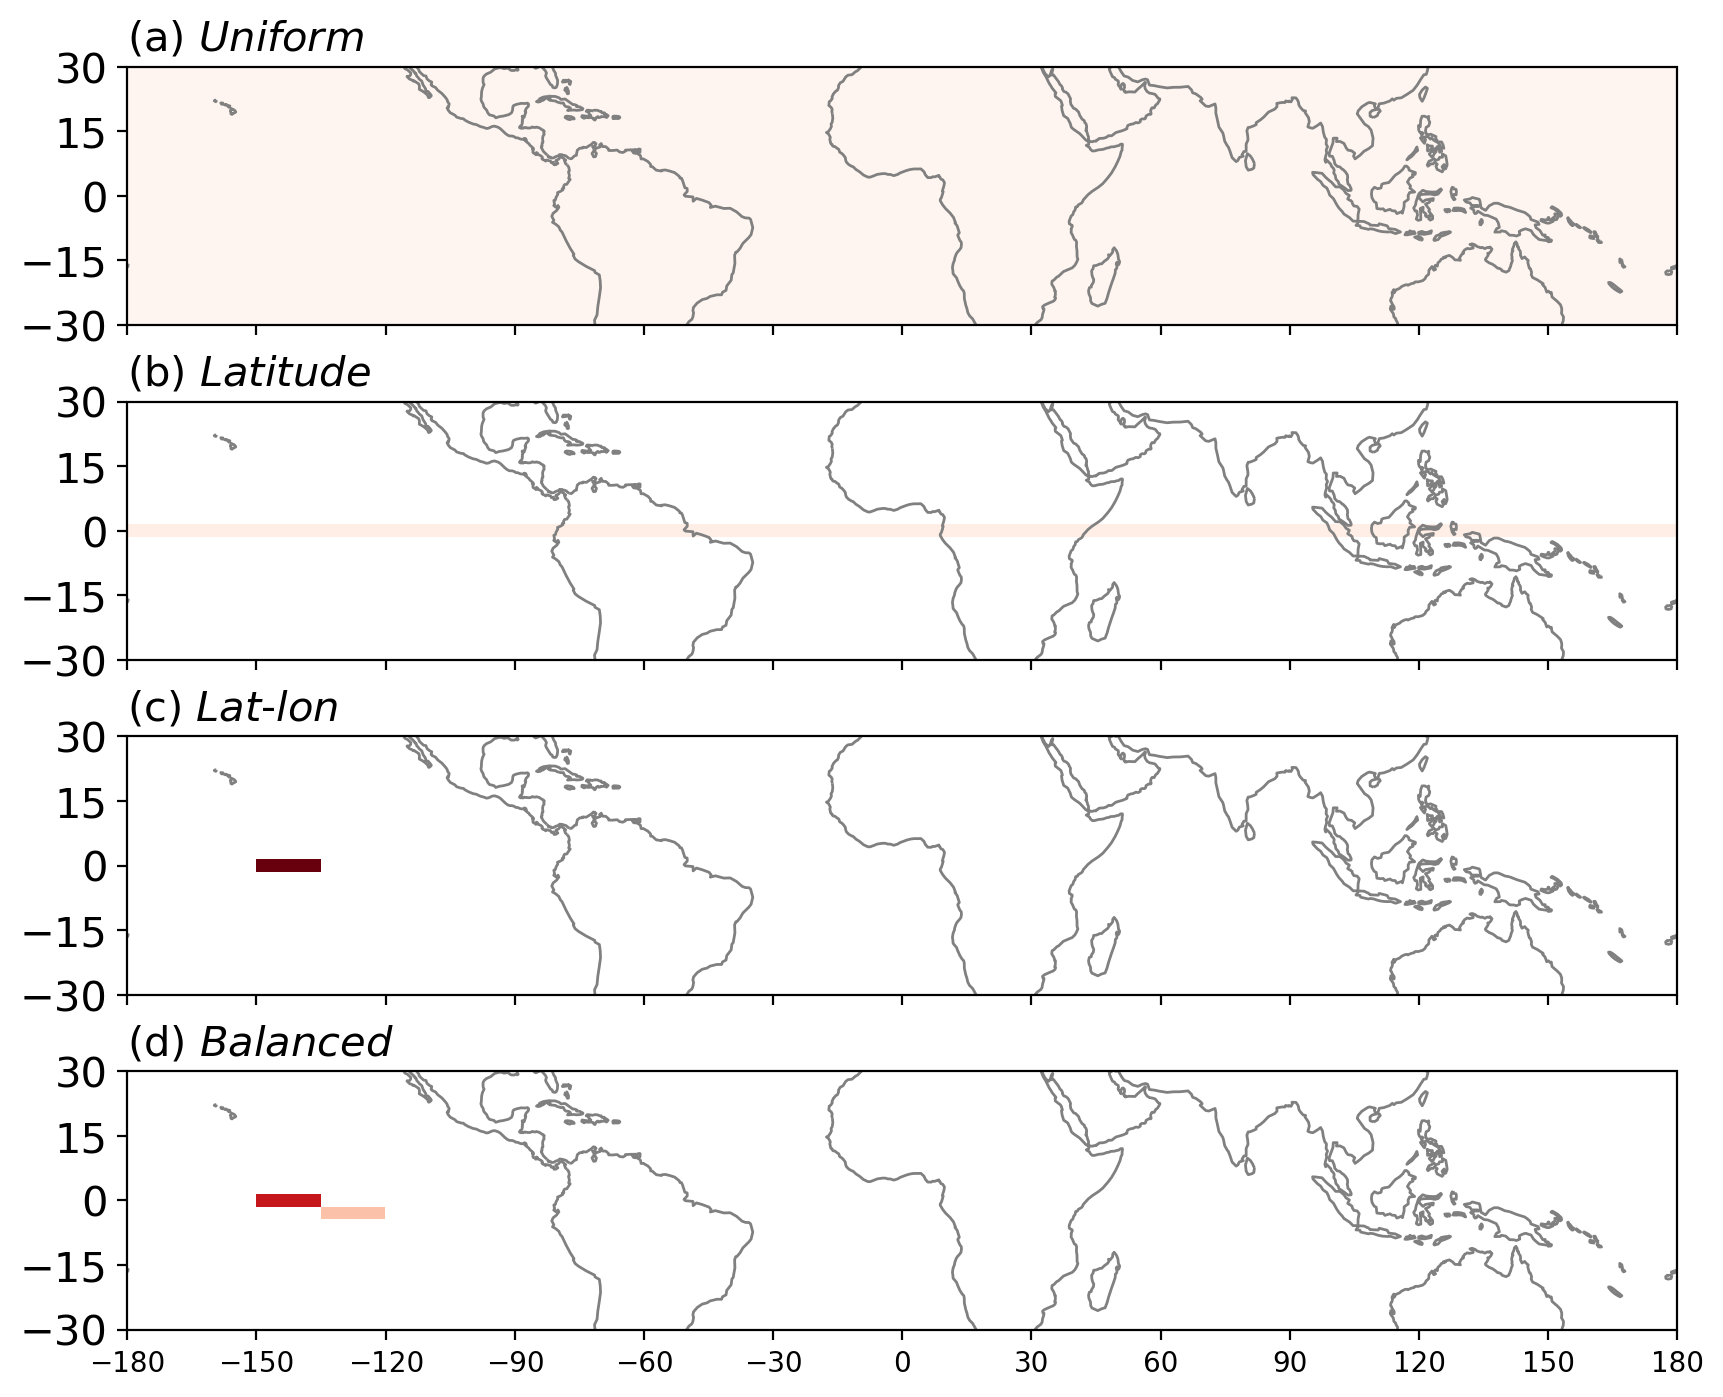

In [50]:
# Height   = [16,  18, 19, 20, 22, 24] # km

iz=3
i_season = 0
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()
    
    
extent = [-180 , 180 , -30 , 30]

#-----------------------------
# Strategy_Uni
#-----------------------------
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_Uni = np.where(Inject_Percent_Uni < 1e-10, -1.0, Inject_Percent_Uni)
ax1_pixel = plt.imshow(Inject_Percent_Uni[iz,:,:,i_season], vmin=0.01, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')

    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1, extend='both', orientation = "horizontal")
# cb1.set_label('[%]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title(f"(a) $Uniform$", loc='left', fontsize=15)


#-----------------------------
# Strategy_Y
#-----------------------------
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_Y = np.where(Inject_Percent_Y < 1e-10, -1.0, Inject_Percent_Y)
ax2_pixel = plt.imshow(Inject_Percent_Y[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, extend='min', ax=ax2)
# cb2.set_label('[%]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_title(f"(b) $Latitude$", loc='left', fontsize=15)


#-----------------------------
# Strategy_XY
#-----------------------------
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_XY = np.where(Inject_Percent_XY < 1e-10, -1.0, Inject_Percent_XY)
ax2_pixel = plt.imshow(Inject_Percent_XY[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')

    
# cb3 = plt.colorbar(ax3_pixel, extend='min', ax=ax3)
# cb3.set_label('[%]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_title(f"(c) $Lat$-$lon$", loc='left', fontsize=15)


#-----------------------------
# Strategy_LP
#-----------------------------
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_LP = np.where(Inject_Percent_LP < 1e-10, -1.0, Inject_Percent_LP)
ax4_pixel = plt.imshow(Inject_Percent_LP[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')


ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_title(f"(d) $Balanced$", loc='left', fontsize=15)

# cb4 = plt.colorbar(ax4_pixel, ax=ax4, extend='both', orientation = "horizontal")
# cb4.set_label('[%]', fontsize=12);

plt.show()

In [51]:
LON_1d

array([-180., -165., -150., -135., -120., -105.,  -90.,  -75.,  -60.,
        -45.,  -30.,  -15.,    0.,   15.,   30.,   45.,   60.,   75.,
         90.,  105.,  120.,  135.,  150.,  165.])

17.92


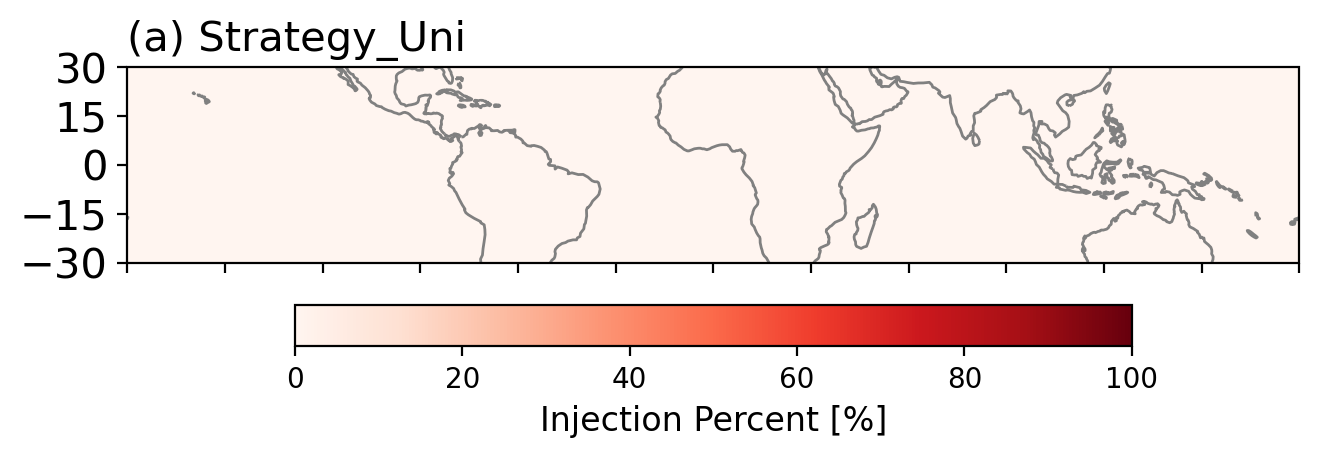

In [52]:
# Height   = [16,  18, 19, 20, 22, 24] # km

iz=1
i_season = 0
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()
    
    
extent = [-180 , 180 , -30 , 30]

#-----------------------------
# Strategy_Uni
#-----------------------------
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_Uni = np.where(Inject_Percent_Uni < 1e-10, -1.0, Inject_Percent_Uni)
ax1_pixel = plt.imshow(Inject_Percent_Uni[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')


ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

# ax1.set_title("18 km", fontsize=20)
# ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title("(a) Strategy_Uni", loc='left', fontsize=15)


cb1 = plt.colorbar(ax1_pixel, ax=ax1, orientation = "horizontal")
cb1.set_label('Injection Percent [%]', fontsize=12);

plt.show()

In [53]:
if 1 in [2,3]:
    print(1)

In [54]:
for i in range(10):
    if i==3: continue
    print(i)

0
1
2
4
5
6
7
8
9
